IMPORT ALL THE NECESSARY LIBRARIES

In [26]:
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [27]:
my_dataset = pd.read_csv('/Users/da_learners_m1_18/Downloads/segmentation data.csv')

In [28]:
my_dataset.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [29]:
my_dataset.keys()

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [30]:
my_dataset.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [31]:
# create scaler object
scaler = StandardScaler()
scaler.fit(my_dataset)

StandardScaler()

In [32]:
# scale the data
scaled_data=scaler.transform(my_dataset)
scaled_data

array([[-1.731185  , -0.91739884, -0.99302433, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [-1.72945295,  1.09003844,  1.00702467, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-1.7277209 , -0.91739884, -0.99302433, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [ 1.7277209 , -0.91739884, -0.99302433, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.72945295,  1.09003844,  1.00702467, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [ 1.731185  , -0.91739884, -0.99302433, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

TO REDUCE DIMENSTION INTO 2

In [33]:
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [34]:
x_pca=pca.transform(scaled_data)

In [35]:
scaled_data.shape

(2000, 8)

In [36]:
x_pca.shape

(2000, 2)

In [37]:
x_pca

array([[ 2.85978214,  0.93667597],
       [ 0.94413038,  0.39449213],
       [-0.02303213, -0.8817974 ],
       ...,
       [-1.84179778, -2.15868138],
       [-2.71683211,  0.56139001],
       [-2.2097949 , -2.42344957]])

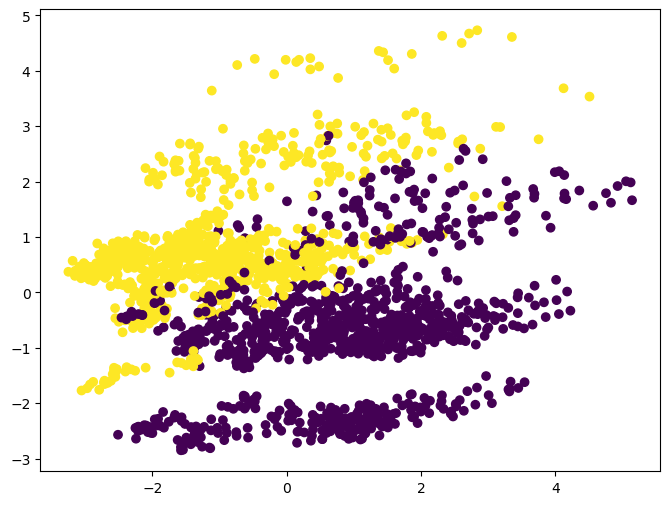

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=my_dataset['Sex'])

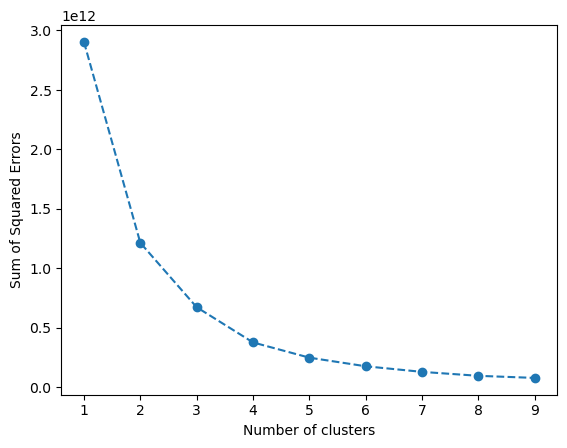

In [39]:
# Perform PCA with n_components=2 to reduce the variables to 2
pca = PCA(n_components=2)
pca_components = pca.fit_transform(my_dataset)

# Use the elbow method to find the optimum number of clusters
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_components)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse,'o--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.show()

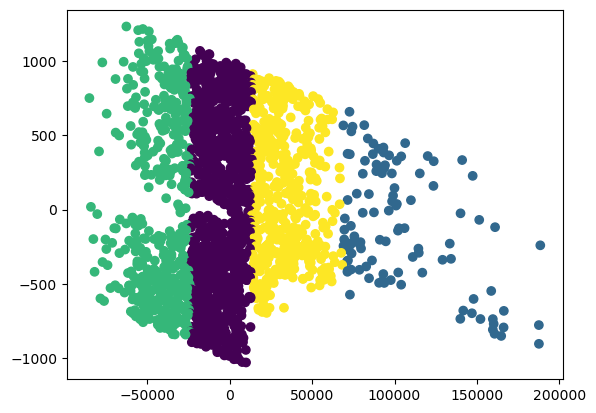

In [40]:
# Use the elbow method to find the optimum number of clusters

num_clusters = 4  # Based on the elbow method, the optimum number of clusters is 4
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pca_components)

# Get the cluster labels for each sample
labels = kmeans.labels_

# Plot the data, colored by cluster
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels)
plt.show()

